In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from pylab import rcParams
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [440]:
%%pycodestyle


# тест Дики-Фуллера
def Diki_Fuller_test(a):
    test_ = sm.tsa.adfuller(a)
    print('adf: ', test_[0])
    print('p-value: ', test_[1])
    print('Critical values: ', test_[4])
    if test_[0] > test_[4]['5%']:
        print('Есть единичные корни, ряд не стационарен')
    else:
        print('Единичных корней нет, ряд стационарен')


# расшиенный тест Дики-Фуллера
def ADF(a):
    k = None
    for i in range(0, 5):
        if i != 0:
            b = a.diff(periods=i).dropna()
        else:
            b = a.dropna()
        test_ = sm.tsa.adfuller(b)
        print('int-level : ', i)
        print('adf: ', test_[0])
        print('p-value: ', test_[1])
        print('Critical values: ', test_[4])
        if (test_[0] > test_[4]['5%']):
            print('Eсть единичные корни, ряд не стационарен')
        else:
            print('Eдиничных корней нет, ряд стационарен')
            k = i
            break
    print('Ряд порядка интегрируемости: ', k)

<br>
<br>
<br>
<br>
<br>
# Read

In [441]:
%%pycodestyle
train = pd.read_excel('training.xlsx', index_col='Date')
test = pd.read_excel('testing.xlsx', index_col='Date')
train.head()

,Value
Date,
1959-01-01,22.8331
1959-02-01,23.2802
1959-03-01,23.6156
1959-04-01,24.1186
1959-05-01,24.4820


<br>
<br>
<br>
<br>
<br>

# 1

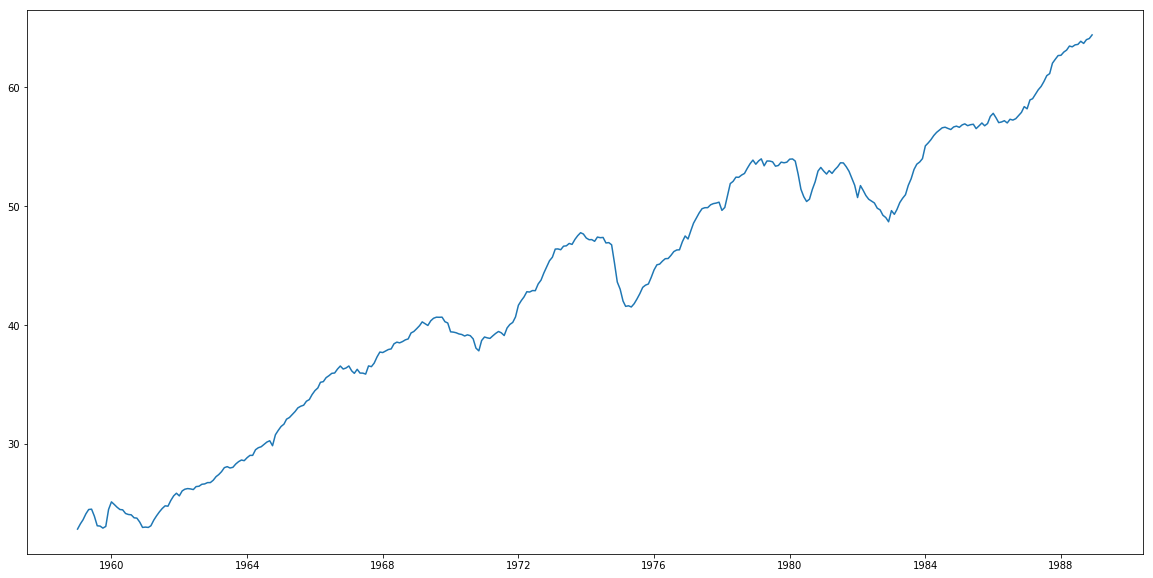

In [442]:
%%pycodestyle
# Посмотрим на чистый ряд
plt.figure(figsize=(20, 10))
plt.plot(train, label='Train')
plt.show()

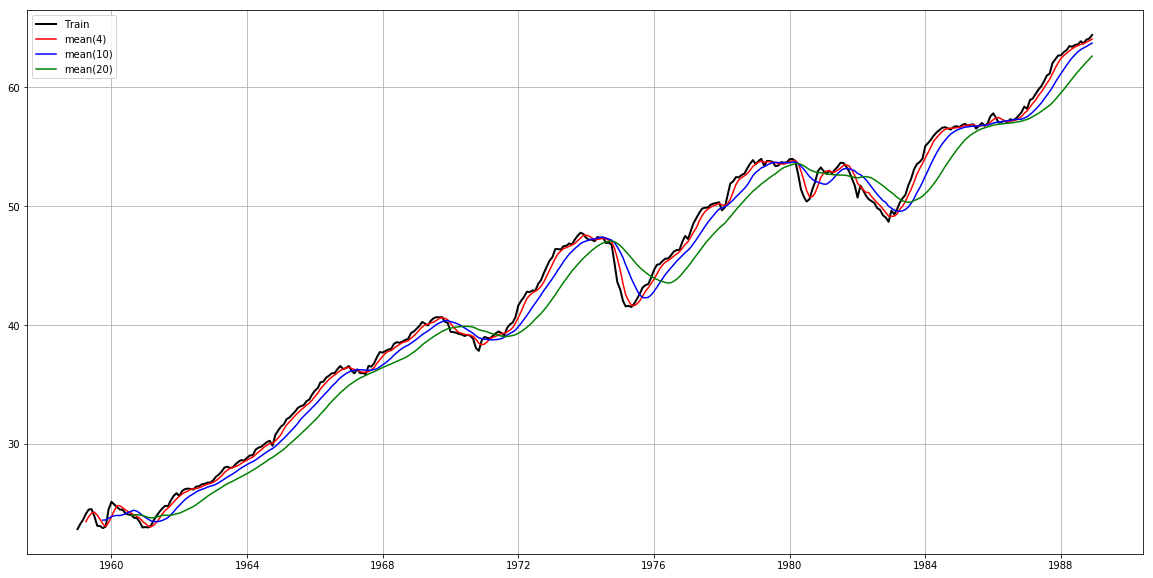

In [443]:
%%pycodestyle
# скользящая статистика(среднее)
m_4 = train.rolling(4).mean()
m_10 = train.rolling(10).mean()
m_20 = train.rolling(20).mean()

plt.figure(figsize=(20, 10))
plt.plot(train, color='black', label='Train',  linewidth=2)
plt.plot(m_4, color='r', label='mean(4)')
plt.plot(m_10, color='b', label='mean(10)')
plt.plot(m_20, color='g', label='mean(20)')
plt.legend()
plt.grid()
plt.show()

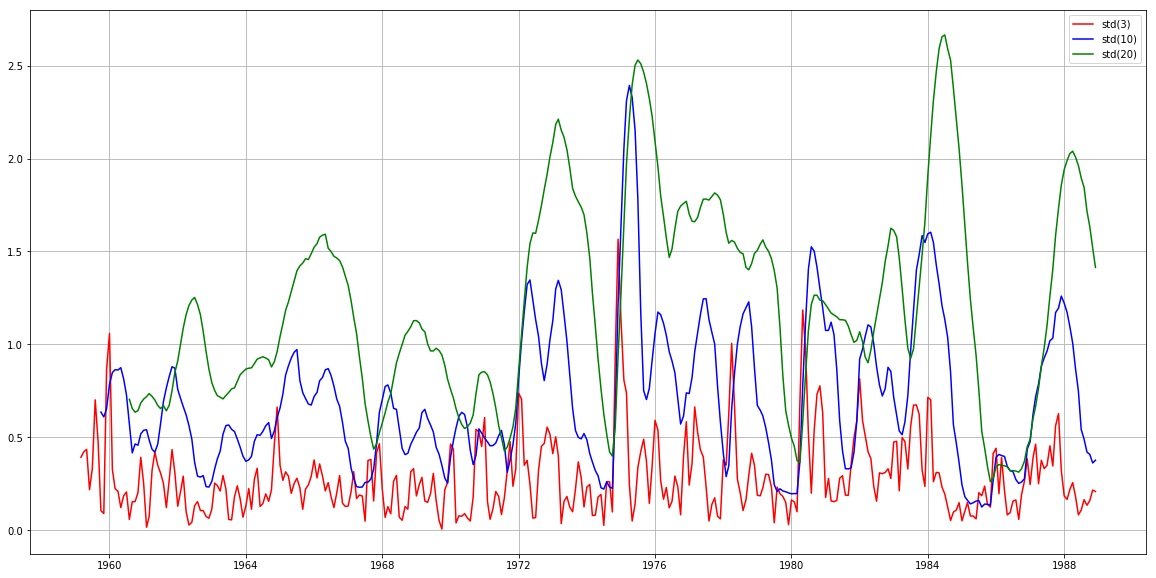

In [444]:
%%pycodestyle
# скользящая статистика(стандартное отклонение)
std_3 = train.rolling(3).std()
std_10 = train.rolling(10).std()
std_20 = train.rolling(20).std()

plt.figure(figsize=(20, 10))
plt.plot(std_3, color='r', label='std(3)')
plt.plot(std_10, color='b', label='std(10)')
plt.plot(std_20, color='g', label='std(20)')
plt.legend()
plt.grid()
plt.show()

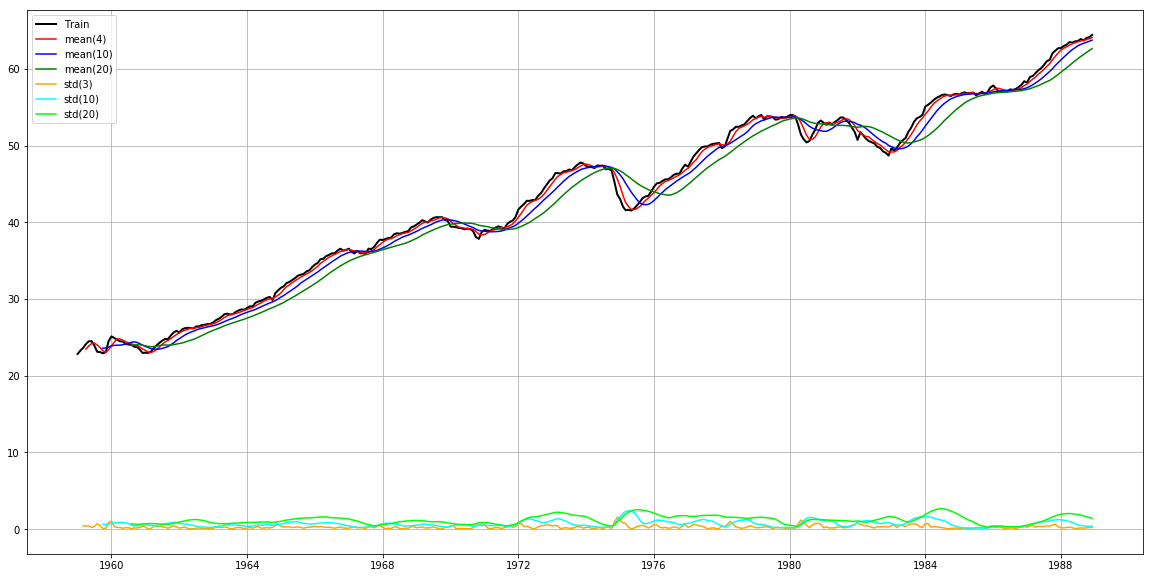

In [445]:
%%pycodestyle
# на одном графике обе статистики
m_4 = train.rolling(4).mean()
m_10 = train.rolling(10).mean()
m_20 = train.rolling(20).mean()
std_3 = train.rolling(3).std()
std_10 = train.rolling(10).std()
std_20 = train.rolling(20).std()

plt.figure(figsize=(20, 10))
plt.plot(train, color='black', label='Train', linewidth=2)
plt.plot(m_4, color='r', label='mean(4)')
plt.plot(m_10, color='b', label='mean(10)')
plt.plot(m_20, color='g', label='mean(20)')
plt.plot(std_3, color='orange', label='std(3)')
plt.plot(std_10, color='aqua', label='std(10)')
plt.plot(std_20, color='lime', label='std(20)')
plt.legend()
plt.grid()
plt.show()

In [446]:
%%pycodestyle
Diki_Fuller_test(train.Value)

adf:  -0.25339117992846366
p-value:  0.9318510422993465
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Есть единичные корни, ряд не стационарен


<br>
<br>
<br>
<br>
<br>

# 2

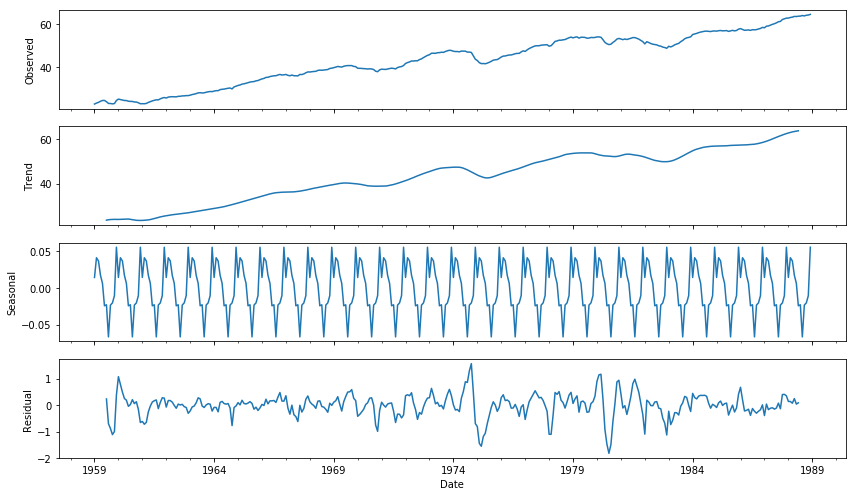

In [447]:
%%pycodestyle
# Аддитивная модель
rcParams['figure.figsize'] = 12, 7
decompos = sm.tsa.seasonal_decompose(train.Value, model="additive")
decompos.plot()
plt.show()

In [448]:
%%pycodestyle
# Проверка Тренда
decompos.trend.dropna(inplace=True)
Diki_Fuller_test(decompos.trend)

adf:  -0.8615760333583692
p-value:  0.8003625761532336
Critical values:  {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}
Есть единичные корни, ряд не стационарен


In [449]:
%%pycodestyle
# Проверка сезональности
decompos.seasonal.dropna(inplace=True)
Diki_Fuller_test(decompos.seasonal)

adf:  -73784826633178.52
p-value:  0.0
Critical values:  {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
Единичных корней нет, ряд стационарен


In [450]:
%%pycodestyle
# Проверка остаточного
decompos.resid.dropna(inplace=True)
Diki_Fuller_test(decompos.resid)

adf:  -7.485563833765422
p-value:  4.6490966746941735e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Единичных корней нет, ряд стационарен


<br>
<br>

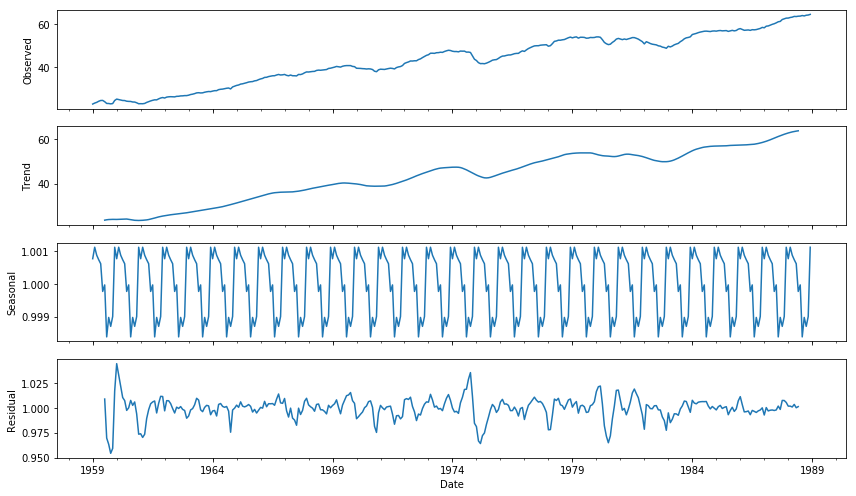

In [451]:
%%pycodestyle
# Мультипликативная модель
decompos = sm.tsa.seasonal_decompose(train.Value, model="multiplicate")
decompos.plot()
plt.show()

In [452]:
%%pycodestyle
# Проверка Тренда
decompos.trend.dropna(inplace=True)
Diki_Fuller_test(decompos.trend)

adf:  -0.8615760333583692
p-value:  0.8003625761532336
Critical values:  {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}
Есть единичные корни, ряд не стационарен


In [453]:
%%pycodestyle
# Проверка сезональности
decompos.seasonal.dropna(inplace=True)
Diki_Fuller_test(decompos.seasonal)

adf:  -208686942550907.1
p-value:  0.0
Critical values:  {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}
Единичных корней нет, ряд стационарен


In [454]:
%%pycodestyle
# Проверка остаточного
decompos.resid.dropna(inplace=True)
Diki_Fuller_test(decompos.resid)

adf:  -7.466083739784995
p-value:  5.200193898332095e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Единичных корней нет, ряд стационарен


<br>
<br>
<br>
<br>
<br>

# 3

In [455]:
%%pycodestyle
# расшиенный тест Дики-Фуллера
ADF(train.Value)

int-level :  0
adf:  -0.25339117992846366
p-value:  0.9318510422993465
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Eсть единичные корни, ряд не стационарен
int-level :  1
adf:  -7.36731149521199
p-value:  9.164149561097916e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Eдиничных корней нет, ряд стационарен
Ряд порядка интегрируемости:  1


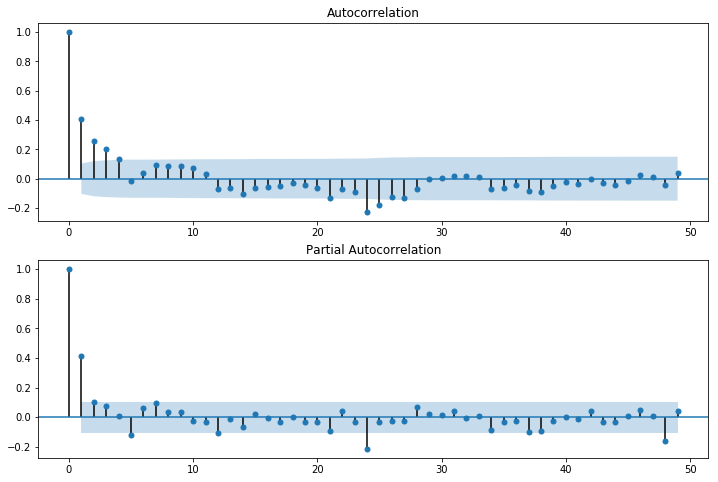

In [456]:
%%pycodestyle
# построим автокорреляцию и частичную автокорреляцию ряда
traindiff = train.Value.diff(periods=1).dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(traindiff.values.squeeze(), lags=49, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(traindiff, lags=49, ax=ax2)


In [532]:
%%pycodestyle
def use_arima_thome_other_actions(train, order, test):
    model = sm.tsa.ARIMA(train.Value.squeeze(), order=order, freq='MS').fit()
    y_r = model.predict(start=train.shape[0],
                        end=train.shape[0]+test.shape[0]-1, typ='levels')
    plt.figure(figsize=(15, 8))
    plt.plot(train.Value, label='Train')
    plt.plot(test.Value, label='Test')
    plt.plot(y_r, label='ARIMA')
    plt.legend(loc='best')
    print('score: {}'.format(r2_score(test.Value, y_r)))
    print('aik: {}'.format(model.aic))
    plt.show()

В рамках анализа графиков используются следующие закономерности, связывающие параметры модели и поведение ее автокорреляционной и частной автокорреляционной функций:

ACF экспоненциально затухает экспоненциально или синусоидальной волной, в зависимости от знаков параметров. При отрицательном значении параметра авторегрессии она экспоненциально затухает, меняя знак, при положительном - не меняя. PACF имеет выброс на лагах 1 и 2, для прочих лагов корреляции нет.

score: -3.32067665533034
aik: 251.08321143936394


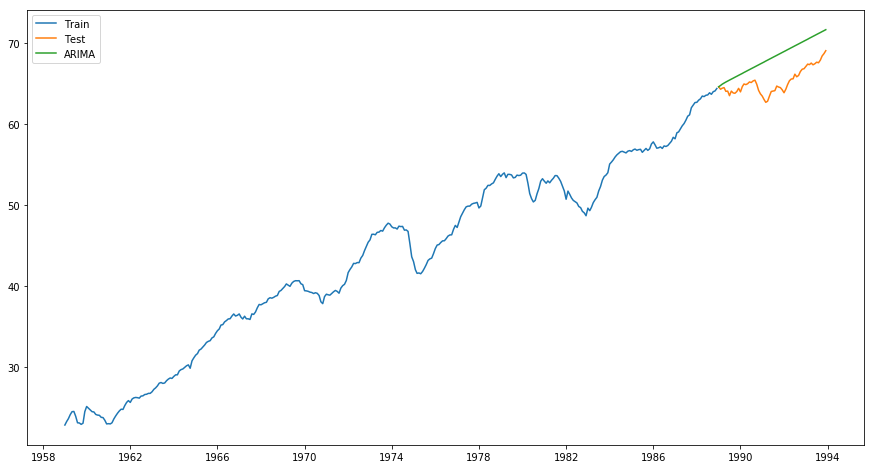

In [535]:
%%pycodestyle
use_arima_thome_other_actions(train, (1, 1, 3), test)

ACF экспоненциально затухает, начиная с первого лага, причем затухание может носить монотонный или колебательный характер. PACF затухает экспоненциально, монотонно или колебательно.

score: 0.020449685874000978
aik: 248.79218215212347


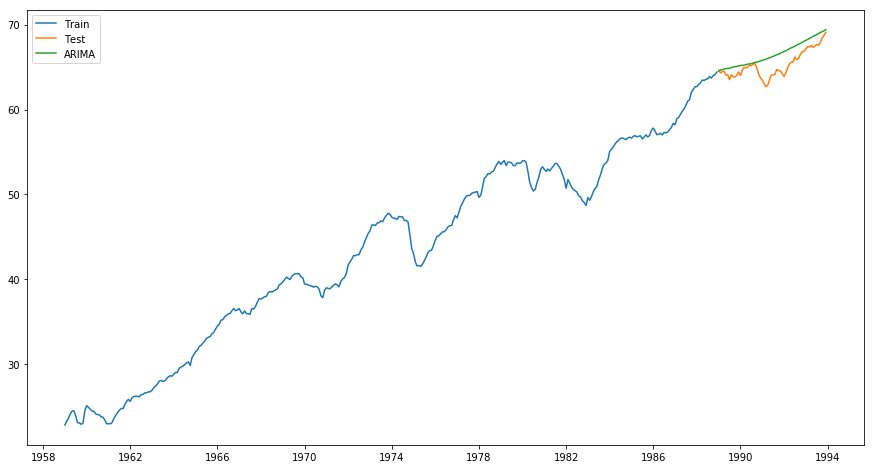

In [536]:
%%pycodestyle
use_arima_thome_other_actions(train, (12, 1, 3), test)

score: -3.2792463487675354
aik: 253.22881327770745


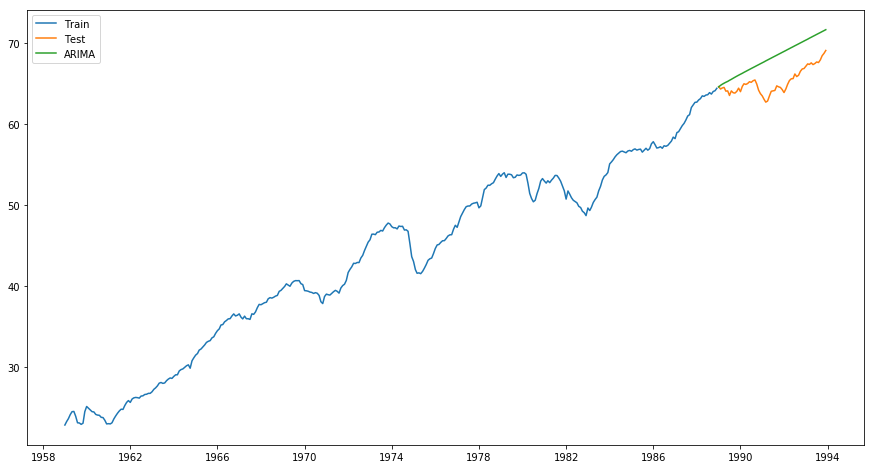

In [544]:
%%pycodestyle
use_arima_thome_other_actions(train, (1, 1, 4), test)